<a href="https://colab.research.google.com/github/emilytong123/MachineLearningProject/blob/main/Project2Data201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Classification using Machine Learning Algorithms

In [10]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import re

**About our dataset:**

The dataset we will be working on is from Kaggle: https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018?select=2018_Financial_Data.csv
We hope to classify the data into two categories:
- Class 1: value of the stock will increase in 2019
- Class 0: value of the stock will decrease in 2019

**Defining important columns:**
- 2019 PRICE VAR [%} - 
- 3Y Net Income Growth (Per Share) - Net Income of company in 3 years divided by number of shares
- 5Y Net Income Growth (Per Share) - Net Income of company in 5 years divided by number of shares
- 10Y Net Income Growth (Per Share) - Net Income of company in 10 years divided by number of shares
- Sector - Sectors constitute a method of sorting publicly traded companies into 11 groups based on primary business activity.

**Questions we are interested in answering:**

- Which Sector experienced the most stocks that increased?
- How do the 3yr Net Income Growth and 10yr Net Income Growth compare for each sector?
- What are frequencies of stocks in each sector that increased or decreased?

In [11]:
df = pd.read_csv('2018_Financial_Data.csv')

In [12]:
df.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,3.380000e+09,131000000.0,0.000000e+00,1.173100e+10,0.0,1.173100e+10,2.56,2.53,4.549505e+09,4.549505e+09,0.917,1.0000,0.310,0.1974,0.124,0.1268,2.932900e+10,1.865300e+10,1.186200e+10,0.1599,0.1241,3.814000e+09,0.000000e+00,3.814000e+09,1.110400e+10,0.000000e+00,2.184800e+10,4.443700e+10,1.676230e+11,...,3.6159,0.0000,0.1638,-2.7062,0.1115,0.0220,0.0550,-0.4840,-0.4700,-0.4674,-0.0266,-0.0305,0.9387,0.1428,0.2462,0.1327,0.1094,0.1107,0.1164,0.1456,0.1044,0.1928,0.1463,0.1579,0.0841,0.1019,0.1396,0.2558,0.1865,0.2348,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,5.870000e+08,310000000.0,0.000000e+00,1.609000e+09,128000000.0,1.481000e+09,0.66,0.66,2.207018e+09,2.216000e+09,0.725,0.4847,0.453,0.2908,0.105,0.1498,6.410000e+09,4.113000e+09,1.919000e+09,0.1553,0.1138,3.280000e+09,0.000000e+00,3.280000e+09,1.498000e+09,3.850000e+08,5.722000e+09,3.789700e+10,2.484500e+10,...,2.8248,34.9666,0.0478,-1.3195,0.0564,0.0405,0.0751,53.8519,65.0000,65.0000,-0.0063,-0.0063,0.4500,0.0961,0.3841,NaN,-0.1402,-0.0104,NaN,-0.1057,-0.0215,NaN,-0.0881,0.8445,NaN,0.0376,-0.0182,0.0000,-0.1421,-0.2785,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,2.264000e+09,0.0,0.000000e+00,2.105300e+10,0.0,2.105300e+10,4.57,4.48,4.564000e+09,4.611000e+09,1.200,0.6173,0.456,0.3273,0.297,0.2011,3.227600e+10,2.319100e+10,2.105300e+10,0.3291,0.2972,3.019000e+09,8.631000e+09,1.165000e+10,6.722000e+09,7.253000e+09,2.878700e+10,4.897600e+10,3.634900e+10,...,5.5264,9.9534,0.2824,-3.2923,0.1187,0.1203,0.2917,1.1928,1.2402,1.2513,-0.0191,-0.0277,0.1132,0.3312,0.3793,0.0876,0.0770,0.0959,0.1271,0.0883,0.1675,0.1719,0.1872,0.2377,0.0876,0.0665,0.0787,0.0815,0.0592,0.0772,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897

In [13]:
df.shape

(4392, 225)

In [14]:
df.Class.value_counts()

1    3046
0    1346
Name: Class, dtype: int64

3046 of the stocks increased in value and 1346 of the stocks decreased in value

Text(0.5, 1.0, 'Number of Stocks that Decreased in Value vs. Number of Stocks that Increased')

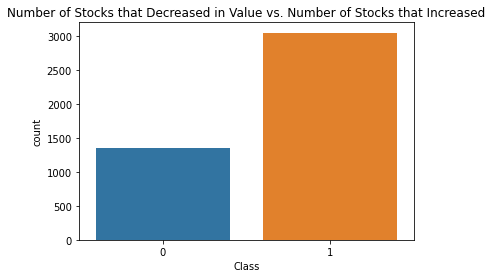

In [15]:
sns.countplot(x = df.Class)
plt.title('Number of Stocks that Decreased in Value vs. Number of Stocks that Increased')

In [16]:
df['2019 PRICE VAR [%]'].max()

3756.7163446162563

In [17]:
df['2019 PRICE VAR [%]'].min()

-99.86477876342505

**Handling missing data**

In [18]:
df.isnull().sum()

Unnamed: 0                0
Revenue                  46
Revenue Growth          139
Cost of Revenue         185
Gross Profit             64
                       ... 
R&D Expense Growth      259
SG&A Expenses Growth    248
Sector                    0
2019 PRICE VAR [%]        0
Class                     0
Length: 225, dtype: int64

Text(0.5, 1.0, 'Revenue Growth per Sector')

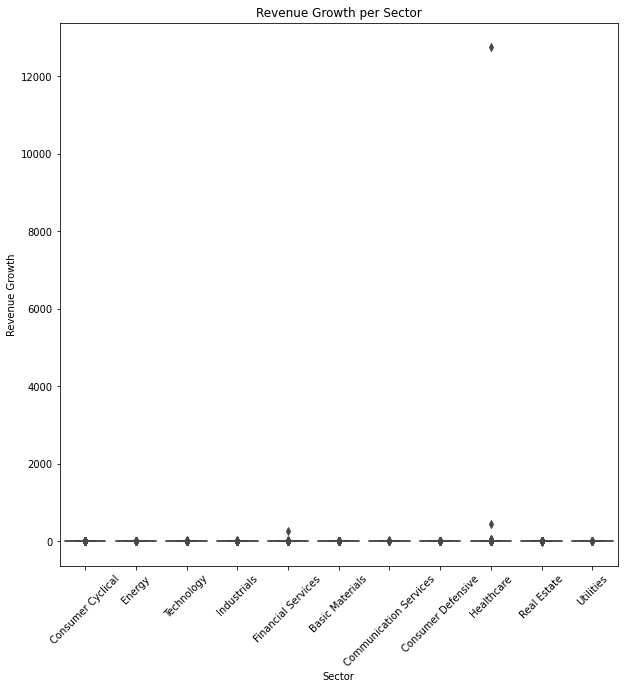

In [19]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'Sector', y = 'Revenue Growth', data = df)
plt.xticks(rotation = 45)
plt.title('Revenue Growth per Sector')

Text(0.5, 1.0, 'SG&A Expenses Growth per Sector')

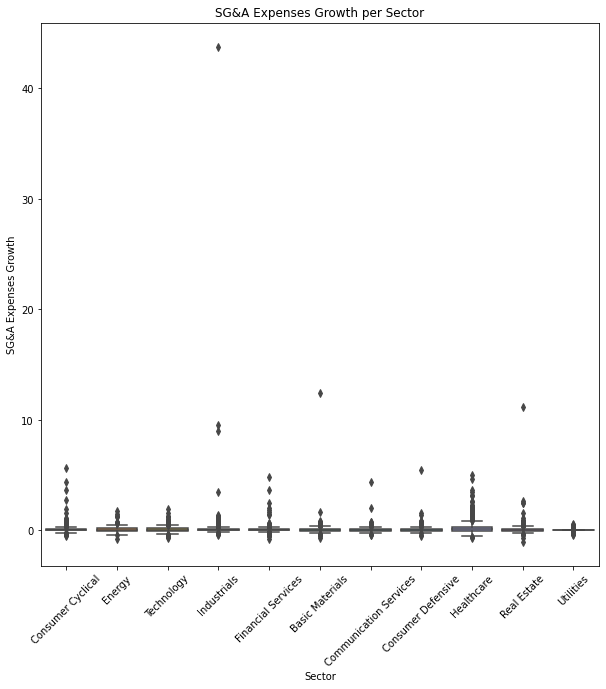

In [20]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'Sector', y = 'SG&A Expenses Growth', data = df)
plt.xticks(rotation = 45)
plt.title('SG&A Expenses Growth per Sector')

Text(0.5, 1.0, 'R&D Expense Growth per Sector')

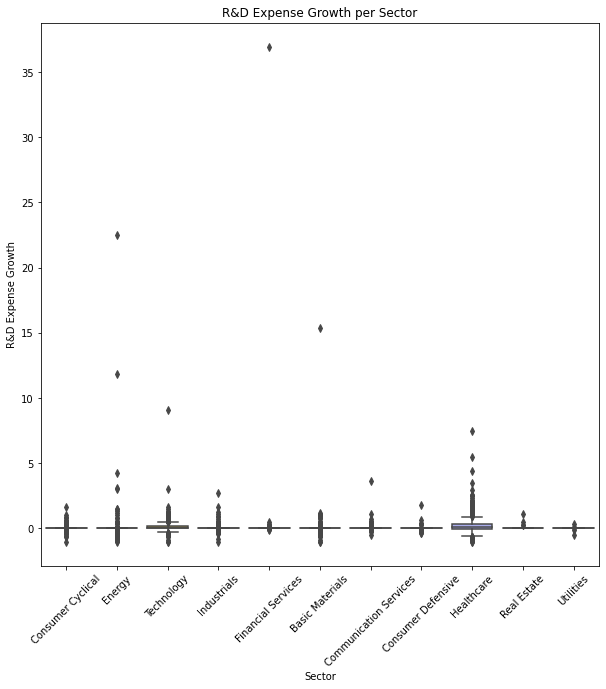

In [21]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'Sector', y = 'R&D Expense Growth', data = df)
plt.xticks(rotation = 45)
plt.title('R&D Expense Growth per Sector')

In [22]:
#list of columns where there are missing values
miss = [col for col in df.columns if df[col].isnull().any()]

In [23]:
#Fill missing values with median 
for val in miss:
  df[val] = df[val].fillna(df[val].median())

Since there are outliers in many of the columns of this data set that have missing values, we are replacing the missing values with the median of each column instead of with the mean of each column. (The mean will be thrown off by outliers.)

In [24]:
df.isnull().sum()

Unnamed: 0              0
Revenue                 0
Revenue Growth          0
Cost of Revenue         0
Gross Profit            0
                       ..
R&D Expense Growth      0
SG&A Expenses Growth    0
Sector                  0
2019 PRICE VAR [%]      0
Class                   0
Length: 225, dtype: int64

# Exploratory Data Analysis

Text(0.5, 1.0, 'Price Change in Sectors %')

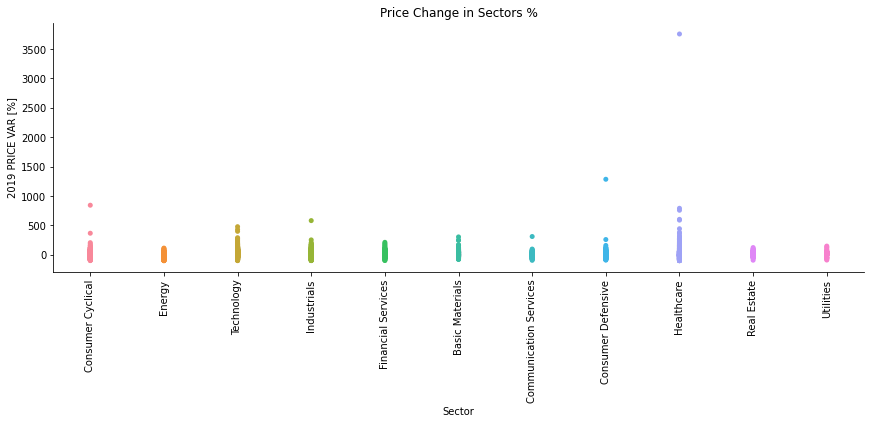

In [25]:
countryregion = sns.catplot(x='Sector', y = '2019 PRICE VAR [%]', jitter = False, data=df, height = 4, aspect = 3)
countryregion.set_xticklabels(rotation = 90)
plt.title('Price Change in Sectors %')

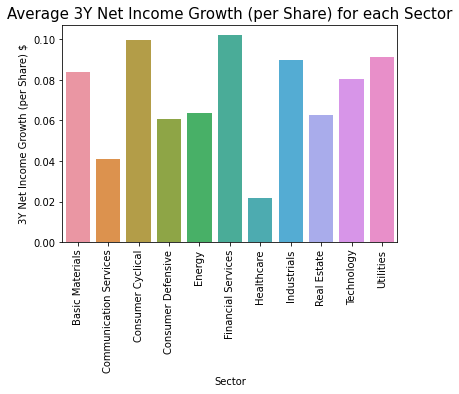

In [26]:
sectors = df.groupby(['Sector']).mean()
sns.barplot( x= sectors.index, y = '3Y Net Income Growth (per Share)', data = sectors)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10)
plt.title('Average 3Y Net Income Growth (per Share) for each Sector', fontsize = 15)
plt.ylabel('3Y Net Income Growth (per Share) $', fontsize = 10)
plt.xlabel('Sector', fontsize = 10)
plt.show()

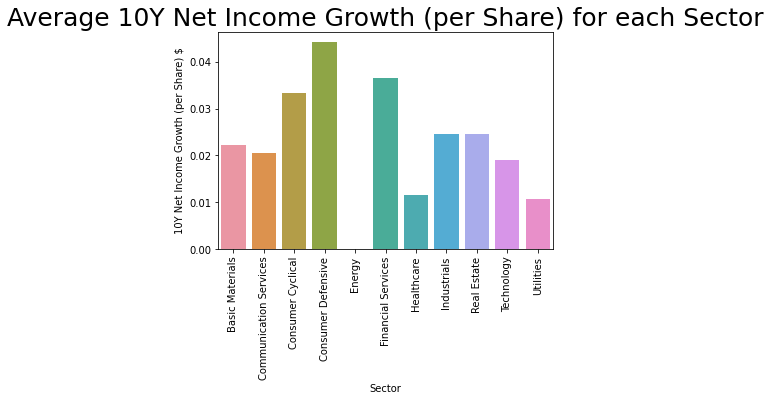

In [27]:
sectors = df.groupby(['Sector']).mean()
sns.barplot( x= sectors.index, y = '10Y Net Income Growth (per Share)', data = sectors)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10)
plt.title('Average 10Y Net Income Growth (per Share) for each Sector', fontsize = 25)
plt.ylabel('10Y Net Income Growth (per Share) $', fontsize = 10)
plt.xlabel('Sector', fontsize = 10)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

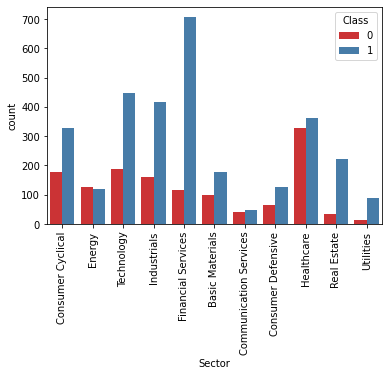

In [28]:
sns.countplot(x="Sector", hue="Class", data=df, palette="Set1")
plt.xticks(rotation = 90)

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing

In [30]:
df.dtypes

Unnamed: 0               object
Revenue                 float64
Revenue Growth          float64
Cost of Revenue         float64
Gross Profit            float64
                         ...   
R&D Expense Growth      float64
SG&A Expenses Growth    float64
Sector                   object
2019 PRICE VAR [%]      float64
Class                     int64
Length: 225, dtype: object

In [31]:
#Going to exclude the first column, which says the name of the stock and the Sector of the stock for the Logistic Regression portion of this 
dfLR = df.select_dtypes(exclude = [object])
dfLR.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
0,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,3.380000e+09,131000000.0,0.000000e+00,1.173100e+10,0.0,1.173100e+10,2.56,2.53,4.549505e+09,4.549505e+09,0.917,1.0000,0.310,0.1974,0.124,0.1268,2.932900e+10,1.865300e+10,1.186200e+10,0.1599,0.1241,3.814000e+09,0.000000e+00,3.814000e+09,1.110400e+10,0.000000e+00,2.184800e+10,4.443700e+10,1.676230e+11,7.883000e+09,...,9.4801,3.6159,0.0000,0.1638,-2.7062,0.1115,0.0220,0.0550,-0.4840,-0.4700,-0.4674,-0.0266,-0.0305,0.9387,0.1428,0.2462,0.1327,0.1094,0.1107,0.11640,0.1456,0.1044,0.1928,0.1463,0.1579,0.0841,0.1019,0.1396,0.2558,0.1865,0.2348,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,32.794573,1
1,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,5.870000e+08,310000000.0,0.000000e+00,1.609000e+09,128000000.0,1.481000e+09,0.66,0.66,2.207018e+09,2.216000e+09,0.725,0.4847,0.453,0.2908,0.105,0.1498,6.410000e+09,4.113000e+09,1.919000e+09,0.1553,0.1138,3.280000e+09,0.000000e+00,3.280000e+09,1.498000e+09,3.850000e+08,5.722000e+09,3.789700e+10,2.484500e+10,7.481000e+09,...,9.6022,2.8248,34.9666,0.0478,-1.3195,0.0564,0.0405,0.0751,53.8519,65.0000,65.0000,-0.0063,-0.0063,0.4500,0.0961,0.3841,0.0295,-0.1402,-0.0104,0.00965,-0.1057,-0.0215,0.0000,-0.0881,0.8445,0.0345,0.0376,-0.0182,0.0000,-0.1421,-0.2785,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,40.588068,1
2,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,2.264000e+09,0.0,0.000000e+00,2.105300e+10,0.0,2.105300e+10,4.57,4.48,4.564000e+09,4.611000e+09,1.200,0.6173,0.456,0.3273,0.297,0.2011,3.227600e+10,2.319100e+10,2.105300e+10,0.3291,0.2972,3.019000e+09,8.631000e+09,1.165000e+10,6.722000e+09,7.253000e+09,2.878700e+10,4.897600e+10,3.634900e+10,9.430000e+09,...,11.4929,5.5264,9.9534,0.2824,-3.2923,0.1187,0.1203,0.2917,1.1928,1.2402,1.2513,-0.0191,-0.0277,0.1132,0.3312,0.3793,0.0876,0.0770,0.0959,0.12710,0.0883,0.1675,0.1719,0.1872,0.2377,0.0876,0.0665,0.0787,0.0815,0.0592,0.0772,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,30.295514,1
3,3.039100e+10,0.4955,1.250000e+

- The features of interest will be all of the columns except for the first column, which gives an abbreviation for which stock it is
- The target will be the Class
-Stocks classified as 0 were stocks that decreased in value (bad to buy)
-Stocks classified as 1 were stocks that increased in value (good to buy)

In [32]:
#X (features) contains all the rows and all the columns except for: 
#the column with the name of stock, the column with the sector names, and the class 
#also deleting the column with the price increase in percentage because that makes it too obvious (positive percentage menas increase and vice versa)
#y (target) contains the class 
X = dfLR.iloc[:,1:221]
y = dfLR.Class

In [33]:
X.head()

,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,...,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth
0,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,3.380000e+09,131000000.0,0.000000e+00,1.173100e+10,0.0,1.173100e+10,2.56,2.53,4.549505e+09,4.549505e+09,0.917,1.0000,0.310,0.1974,0.124,0.1268,2.932900e+10,1.865300e+10,1.186200e+10,0.1599,0.1241,3.814000e+09,0.000000e+00,3.814000e+09,1.110400e+10,0.000000e+00,2.184800e+10,4.443700e+10,1.676230e+11,7.883000e+09,0.000000e+00,...,32.8051,0.0000,9.4801,3.6159,0.0000,0.1638,-2.7062,0.1115,0.0220,0.0550,-0.4840,-0.4700,-0.4674,-0.0266,-0.0305,0.9387,0.1428,0.2462,0.1327,0.1094,0.1107,0.11640,0.1456,0.1044,0.1928,0.1463,0.1579,0.0841,0.1019,0.1396,0.2558,0.1865,0.2348,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308
1,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,5.870000e+08,310000000.0,0.000000e+00,1.609000e+09,128000000.0,1.481000e+09,0.66,0.66,2.207018e+09,2.216000e+09,0.725,0.4847,0.453,0.2908,0.105,0.1498,6.410000e+09,4.113000e+09,1.919000e+09,0.1553,0.1138,3.280000e+09,0.000000e+00,3.280000e+09,1.498000e+09,3.850000e+08,5.722000e+09,3.789700e+10,2.484500e+10,7.481000e+09,1.566000e+09,...,34.5026,-19.2817,9.6022,2.8248,34.9666,0.0478,-1.3195,0.0564,0.0405,0.0751,53.8519,65.0000,65.0000,-0.0063,-0.0063,0.4500,0.0961,0.3841,0.0295,-0.1402,-0.0104,0.00965,-0.1057,-0.0215,0.0000,-0.0881,0.8445,0.0345,0.0376,-0.0182,0.0000,-0.1421,-0.2785,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265
2,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,2.264000e+09,0.0,0.000000e+00,2.105300e+10,0.0,2.105300e+10,4.57,4.48,4.564000e+09,4.611000e+09,1.200,0.6173,0.456,0.3273,0.297,0.2011,3.227600e+10,2.319100e+10,2.105300e+10,0.3291,0.2972,3.019000e+09,8.631000e+09,1.165000e+10,6.722000e+09,7.253000e+09,2.878700e+10,4.897600e+10,3.634900e+10,9.430000e+09,0.000000e+00,...,19.7008,-97.6484,11.4929,5.5264,9.9534,0.2824,-3.2923,0.1187,0.1203,0.2917,1.1928,1.2402,1.2513,-0.0191,-0.0277,0.1132,0.3312,0.3793,0.0876,0.0770,0.0959,0.12710,0.0883,0.1675,0.1719,0.1872,0.2377,0.0876,0.0665,0.0787,0.0815,0.0592,0.0772,0.1989,0.0387,0.0382,0.1014,-0.0169,0.03

In [34]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [35]:
#splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [36]:
#Instantiate
LogReg = LogisticRegression(max_iter = 500)

In [37]:
#Preprocessing using standard scalar
scal = preprocessing.StandardScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.transform(X_test)

In [38]:
#fitting to the training data
LogReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting Using the Logistic Regression Model

In [93]:
#making prediction on X_test
y_pred = LogReg.predict(X_test)

In [94]:
y_pred_proba = LogReg.predict_proba(X_test)
y_pred_proba

array([[0.50383409, 0.49616591],
       [0.40381274, 0.59618726],
       [0.32731449, 0.67268551],
       ...,
       [0.13998816, 0.86001184],
       [0.32593033, 0.67406967],
       [0.35170614, 0.64829386]])

In [95]:
#For the first instance/first stock in the X_test data, the logistic regression model
#predicts that there is a 50% chance it will decrease and a 49.8% chance it will increase
y_pred_proba[0]

array([0.50383409, 0.49616591])

In [96]:
X_test[0] 

array([-1.98262962e-02, -2.05147620e-01, -2.43368188e-01, -1.17076483e-01,
       -2.19591081e-01, -2.27345563e-01, -2.10925279e-01, -2.50109645e-01,
       -2.02493860e-01, -1.52863560e-01, -9.33701340e-02,  2.55160291e-02,
       -2.00350627e-01, -8.95012975e-02, -2.01487784e-01, -9.73659644e-03,
       -9.18782588e-03, -1.23015419e-01, -1.22338770e-01,  4.45391442e-01,
        4.83042684e-01,  4.60636524e-02,  6.30368854e-02,  4.64447950e-02,
        6.50420588e-02, -2.41344054e-01, -2.29409542e-01, -2.04573867e-01,
        6.27988330e-02,  6.22548735e-02, -7.91811151e-02, -7.62081657e-02,
       -9.30829934e-02, -1.89195819e-01, -4.31721813e-02, -1.17843884e-01,
       -2.22706697e-01, -1.94481136e-01, -8.28238740e-02, -1.45363236e-01,
       -2.40016909e-01, -1.66190780e-01, -1.38793377e-01, -1.03540066e-01,
       -1.00047840e-01, -1.57988277e-01, -1.84570908e-01, -1.01302252e-01,
       -1.71994521e-01, -8.25597813e-02, -2.39570444e-01, -1.44095516e-01,
        8.53325777e-02, -

In [97]:
#Array that the gives the probability that the stock will decrease
y_pred_proba[:,0]

array([0.50383409, 0.40381274, 0.32731449, ..., 0.13998816, 0.32593033,
       0.35170614])

In [98]:
#Array that gives the probability that the stock will increase
probInc = y_pred_proba[:,1]
probInc

array([0.49616591, 0.59618726, 0.67268551, ..., 0.86001184, 0.67406967,
       0.64829386])

In [99]:
#Array with the predicted class of each instance of the Test data 
predClasses = (y_pred_proba[:,1]>0.5).astype(np.int64)
predClasses

array([0, 1, 1, ..., 1, 1, 1])

In [100]:
X_test[250]

array([ 3.98309047e-02, -2.07575909e-01, -2.60460788e-01, -2.38983247e-02,
       -2.22244864e-01, -2.26058808e-01, -2.56509145e-01, -2.50001974e-01,
       -2.53673983e-01, -1.54656927e-01, -9.33701340e-02,  2.55160291e-02,
       -2.64679998e-01, -8.95012975e-02, -2.66319161e-01, -1.09981419e-02,
       -1.05212855e-02, -1.07072103e-01, -1.06803390e-01, -3.92435298e-01,
        7.96425780e-01, -1.75406079e-01, -5.92193037e-01, -1.78098696e-01,
       -5.95811101e-01, -2.76476808e-01, -2.78355403e-01, -2.68095445e-01,
       -5.94164955e-01, -6.09582571e-01, -7.73692611e-02, -6.89916927e-02,
       -8.84673085e-02, -1.83148891e-01, -4.39564929e-02, -1.14184154e-01,
       -2.22056000e-01, -1.94481136e-01, -8.30175094e-02, -1.48188317e-01,
       -2.40085658e-01, -1.64634065e-01, -1.40661379e-01, -1.03665084e-01,
       -1.00068677e-01, -1.58032344e-01, -1.84652734e-01, -6.76354472e-02,
       -1.73276150e-01, -8.25597813e-02, -2.35577904e-01, -1.43636176e-01,
        8.31999452e-02, -

In [101]:
y_pred_proba[250]

array([0.14700321, 0.85299679])

In [102]:
probInc[250]

0.8529967851440687

In [103]:
predClasses[250]

1

For the 250th stock in the X_test data, the Logistic Regression Model predicts that there is a 14% chance the stock will decrease and a 86% chance the stock will increase. The model classifies this stock as Class 1, increase.

# **Interpreting Results of the Logistic Regression Prediction**

In [104]:
#Accuracy Predicting on the Test Data
print('Accuracy: ', LogReg.score(X_test,y_test))

Accuracy:  0.697632058287796


This Logistic Regression Model has an Accuracy of about 70%

In [105]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.18      0.27       339
           1       0.72      0.93      0.81       759

    accuracy                           0.70      1098
   macro avg       0.62      0.56      0.54      1098
weighted avg       0.66      0.70      0.64      1098



In [106]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import f1_score

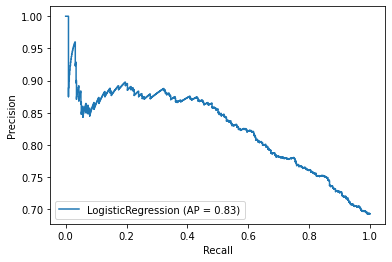

In [53]:
PRC = plot_precision_recall_curve(LogReg,X_test,y_test)

**Interpretation of Precision and Recall Scores**

The precision is the ratio of the correctly predicted positive values (class 0) to all of the values that were predicted positive.
- Precision = TP/ TP + FP
- With our precision score of about 71%, we know that 71% of the times the model predicted a stock would decrease, it actually decreased. 


In [107]:
print(precision_score(y_test,y_pred))

0.7176350662589195


The recall is the ratio of correctly predicted positive values (class 0) to all of the values that were actually positive (whether or not they were predicted positive).
- Recall = TP/TP+FN
- With our recall score of about 92%, we know that about 92% of the stocks that decreased (class 0) were correctly predicted to decrease.

In [108]:
print(recall_score(y_test,y_pred))

0.927536231884058


P = Precision
R = Recall


**f1 score = 2 (PR/P+R)**

In [109]:
print(f1_score(y_test, y_pred))

0.8091954022988506


Text(0.5, 15.0, 'Predicted')

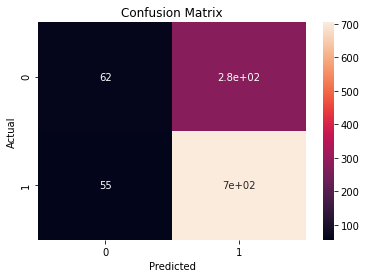

In [56]:
#Confusion Matrix 
#TP FP
#FN TN

CM = confusion_matrix(y_test, y_pred)
categories = [0,1]
sns.heatmap(pd.DataFrame(CM), annot = True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

Reminder: 0 represents Class 0 (stocks that dec in value); 1 represents Class 1 (stocks that inc in value)
- 1101 stocks that are part of the test data (25% of full data set)
- 62 True Positives (predicted Class 0 , is Class 0 )
- 700 True Negatives (predicted Class 1, is Class 1)
- 280 False Positives (predicted Class 1, is Class 0)
- 56 False Negatives (predicted Class 0, is Class 1)

Since 700 of the stocks in the test set were true negatives, we can predict that there is a 64% chance any stock will be increasing.
700/1100 = 64%

Text(0, 0.5, 'Class')

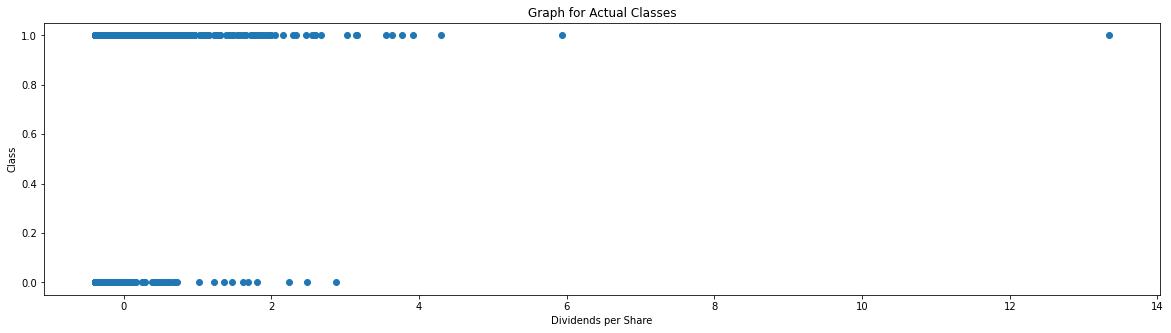

In [57]:
plt.figure(figsize = (20,5))
plt.scatter(x= X_test[:,19], y = y_test)
plt.title('Graph for Actual Classes')
plt.xlabel('Dividends per Share')
plt.ylabel('Class')

Text(0, 0.5, 'Class')

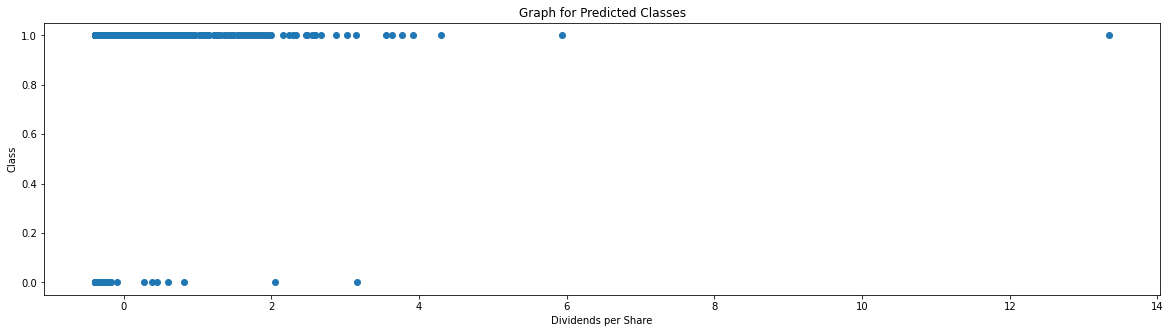

In [58]:
plt.figure(figsize = (20,5))
plt.scatter(x= X_test[:,19], y = y_pred)
plt.title('Graph for Predicted Classes')
plt.xlabel('Dividends per Share')
plt.ylabel('Class')

After looking at the confusion matrix of our logistic regression model as well as these graphs, we have come to this interpretation of the Logistic Regression Model: 
- In terms of incorrectly predicting, the model encounters more false positives. The model thinks that the stock will increase when it really does not.
-This is shown in the graphs above as well as the confusion matrix. If you look at the bottom of the graphs,there are more points in Class 0 for the actual test class graph on top than the predicted test class graph on the bottom.

# Neural Networks

In [59]:
from keras.models import Sequential, load_model 
from keras.layers import Dense, BatchNormalization
from numpy import random
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [60]:
#Starting a sequential model 
random.seed(11)
nnmodel = Sequential()
#Creating an input layer and a middle layer
nnmodel.add(Dense(40, input_shape = (220,),activation = 'relu'))
#For some reason this model is very inconsistent (sometimes when I run it the accuracy is about 70%, sometimes 30%, a few times near 94%)
#adding batch normalization to see if that will help
nnmodel.add(BatchNormalization())
#The final layer is an output layer with 1 neuron
nnmodel.add(Dense(1, activation = 'sigmoid'))
#We are creating a binary classification model 
nnmodel.compile(loss = 'binary_crossentropy', optimizer = "sgd",metrics = ['accuracy'])
nnmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                8840      
_________________________________________________________________
batch_normalization (BatchNo (None, 40)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 9,041
Trainable params: 8,961
Non-trainable params: 80
_________________________________________________________________


In [61]:
#Using the same train and test data that we used for Logistic Regression
#training model for 20 epochs
hist1 = nnmodel.fit(X_train,y_train,epochs = 20, validation_data = (X_test, y_test))
#Seeing how accurate the neural networks model is on the testing data set 
accuracy = nnmodel.evaluate(X_test,y_test)
print(accuracy)

Epoch 1/20
103/103 [==============================] - 0s 3ms/step - loss: 0.7603 - accuracy: 0.5571 - val_loss: 1.7419 - val_accuracy: 0.6721
Epoch 2/20
103/103 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.6615 - val_loss: 2.4331 - val_accuracy: 0.6849
Epoch 3/20
103/103 [==============================] - 0s 1ms/step - loss: 0.6005 - accuracy: 0.6910 - val_loss: 2.6104 - val_accuracy: 0.6913
Epoch 4/20
103/103 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.6988 - val_loss: 2.6067 - val_accuracy: 0.6913
Epoch 5/20
103/103 [==============================] - 0s 1ms/step - loss: 0.5728 - accuracy: 0.7022 - val_loss: 2.5309 - val_accuracy: 0.6913
Epoch 6/20
103/103 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.6995 - val_loss: 2.5852 - val_accuracy: 0.6876
Epoch 7/20
103/103 [==============================] - 0s 1ms/step - loss: 0.5554 - accuracy: 0.7168 - val_loss: 2.5606 - val_accuracy: 0.6931
Epoch 

The model's accuracy varies every time to due an element of randomization in the initial weights, but the highest training accuracy is about 75% and the highest testing accuracy is about 69%

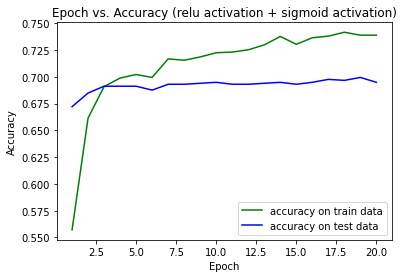

In [62]:
#graphing accuracy for this 
accTrain1 = hist1.history['accuracy']
accVal1 = hist1.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs,accTrain1, 'g', label = 'accuracy on train data')
plt.plot(epochs,accVal1, 'b', label = 'accuracy on test data')
plt.title('Epoch vs. Accuracy (relu activation + sigmoid activation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [63]:
#Doing it again with the EarlyStopping and ModelCheckpoint callbacks 
monitor_val_acc = EarlyStopping(monitor = 'val_acc', patience = 3)
modelCheckpoint = ModelCheckpoint('best_NN_Model.hdf5', save_best_only = True)
histCB = nnmodel.fit(X_train,y_train, epochs = 100, callbacks = [monitor_val_acc, modelCheckpoint], validation_data = (X_test, y_test))
accuracy2 = nnmodel.evaluate(X_test, y_test)

Epoch 1/100
103/103 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.7359 - val_loss: 1.8032 - val_accuracy: 0.6931
Epoch 2/100
103/103 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7380 - val_loss: 1.6196 - val_accuracy: 0.6958
Epoch 3/100
103/103 [==============================] - 0s 1ms/step - loss: 0.5104 - accuracy: 0.7447 - val_loss: 1.3864 - val_accuracy: 0.6976
Epoch 4/100
103/103 [==============================] - 0s 1ms/step - loss: 0.5090 - accuracy: 0.7380 - val_loss: 1.4607 - val_accuracy: 0.6976
Epoch 5/100
103/103 [==============================] - 0s 1ms/step - loss: 0.5012 - accuracy: 0.7474 - val_loss: 1.3481 - val_accuracy: 0.6958
Epoch 6/100
103/103 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.7489 - val_loss: 1.1868 - val_accuracy: 0.6958
Epoch 7/100
103/103 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.7477 - val_loss: 0.9752 - val_accuracy: 0.6958

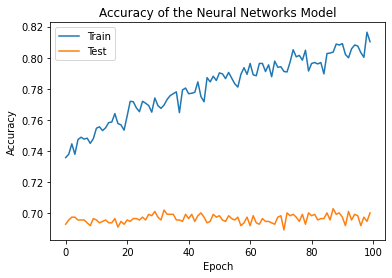

In [64]:
plt.figure()
plt.plot(histCB.history['accuracy'])
plt.plot(histCB.history['val_accuracy'])
plt.title('Accuracy of the Neural Networks Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()
#this represents a model that is starting to overfit as the training accuracy is going up while the test accuracy is not improving

In [65]:
from keras.models import load_model

In [66]:
#Using the model that was saved from the modelCheckpoint Callback
best_model = load_model('best_NN_Model.hdf5')
best_model.evaluate(X_test, y_test)

35/35 [==============================] - 0s 773us/step - loss: 0.6236 - accuracy: 0.6931


[0.6236174702644348, 0.693078339099884]

Highest validation accuracy (accuracy predicting on test set) is about 70%

**Comparing loss and accuracy of different activation functions **

In [67]:
np.random.seed(21)
def get_model(act_function):
  model = Sequential()
  model.add(Dense(40, input_shape = (220,), activation = act_function))
  model.add(Dense(1, activation = 'sigmoid'))
  return model 

In [68]:
activations = ['relu', 'tanh','sigmoid']
activation_results = {}
for a in activations:
  model = get_model(a)
  model.compile(loss = 'binary_crossentropy', optimizer = "sgd",metrics = ['accuracy'])
  h_callback = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test), verbose = 0)
  activation_results[a] = h_callback

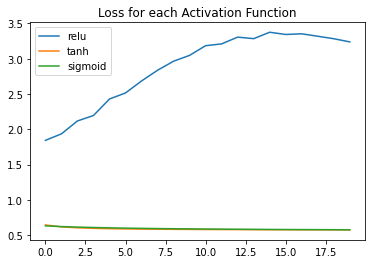

In [69]:
val_loss_per_function = {k:v.history['val_loss'] for k,v in activation_results.items()}
val_loss_curves = pd.DataFrame(val_loss_per_function)
val_loss_curves.plot(title = "Loss for each Activation Function")

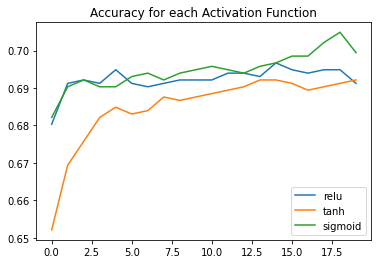

In [70]:
val_acc_per_function = {k:v.history['val_accuracy'] for k,v in activation_results.items()}
val_acc_curves = pd.DataFrame(val_acc_per_function)
val_acc_curves.plot(title = "Accuracy for each Activation Function")

The tanh activation function displays the lowest loss

**Neural network model using tanh activation function

In [71]:
#Starting a sequential model 
random.seed(7)
modelT = Sequential()
#Creating an input layer and a middle layer
modelT.add(Dense(40, input_shape = (220,),activation = 'tanh'))
#The final layer is an output layer with 1 neuron
modelT.add(Dense(1, activation = 'sigmoid'))
#We are creating a binary classification model 
modelT.compile(loss = 'binary_crossentropy', optimizer = "sgd",metrics = ['accuracy'])
modelT.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 40)                8840      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 41        
Total params: 8,881
Trainable params: 8,881
Non-trainable params: 0
_________________________________________________________________


In [72]:
#Using the same train and test data that we used for Logistic Regression
#training model for 20 epochs
histT = modelT.fit(X_train,y_train,epochs = 20, validation_data = (X_test, y_test)) 
#Seeing how accurate the neural networks model is on the testing data set 
accuracy = modelT.evaluate(X_test,y_test)
print(accuracy)

Epoch 1/20
103/103 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.6190 - val_loss: 0.6374 - val_accuracy: 0.6639
Epoch 2/20
103/103 [==============================] - 0s 1ms/step - loss: 0.6149 - accuracy: 0.6767 - val_loss: 0.6069 - val_accuracy: 0.6758
Epoch 3/20
103/103 [==============================] - 0s 1ms/step - loss: 0.5904 - accuracy: 0.6858 - val_loss: 0.5930 - val_accuracy: 0.6803
Epoch 4/20
103/103 [==============================] - 0s 1ms/step - loss: 0.5770 - accuracy: 0.6922 - val_loss: 0.5845 - val_accuracy: 0.6767
Epoch 5/20
103/103 [==============================] - 0s 1ms/step - loss: 0.5680 - accuracy: 0.6961 - val_loss: 0.5796 - val_accuracy: 0.6849
Epoch 6/20
103/103 [==============================] - 0s 1ms/step - loss: 0.5616 - accuracy: 0.7019 - val_loss: 0.5770 - val_accuracy: 0.6885
Epoch 7/20
103/103 [==============================] - 0s 1ms/step - loss: 0.5567 - accuracy: 0.7061 - val_loss: 0.5751 - val_accuracy: 0.6913
Epoch 

Graphs showing the accuracies and losses for different Epochs

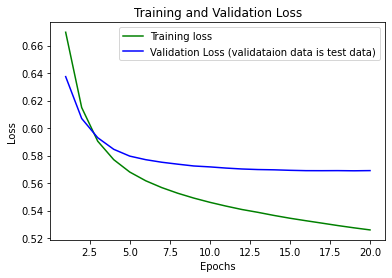

In [73]:
lossT = histT.history['loss']
valLossT = histT.history['val_loss']
epochs = range(1,21)
plt.plot(epochs,lossT, 'g', label = 'Training loss')
plt.plot(epochs, valLossT, 'b', label = 'Validation Loss (validataion data is test data)')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

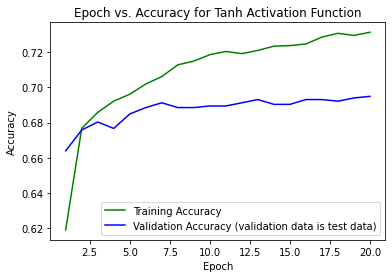

In [74]:
accT = histT.history['accuracy']
valAccT = histT.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs,accT, 'g', label = 'Training Accuracy')
plt.plot(epochs,valAccT,'b', label = 'Validation Accuracy (validation data is test data)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs. Accuracy for Tanh Activation Function')
plt.legend()
plt.show()

# Decision Trees

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [76]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]

In [77]:
#Splitting data into training and testing data
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 99)

#Instantiate dt
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=99)

In [78]:
scal = preprocessing.StandardScaler()
X_train_dt = scal.fit_transform(X_train_dt)
X_test_dt = scal.transform(X_test_dt)

In [79]:
#Fit dt to the training set
dt.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [80]:
#The probability of classification for the test data
y_pred_probDT = dt.predict_proba(X_test_dt)
y_pred_probDT

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [81]:
#Predict test set labels
y_pred = dt.predict(X_test_dt)

#Evaluate test-set accuracy using function
accuracy_score(y_test_dt, y_pred)

0.6962457337883959

In [82]:
#Evaluate test-set accuracy by formula
accuracy = float(np.sum(y_pred==y_test_dt))/y_test_dt.shape[0]
accuracy

0.6962457337883959

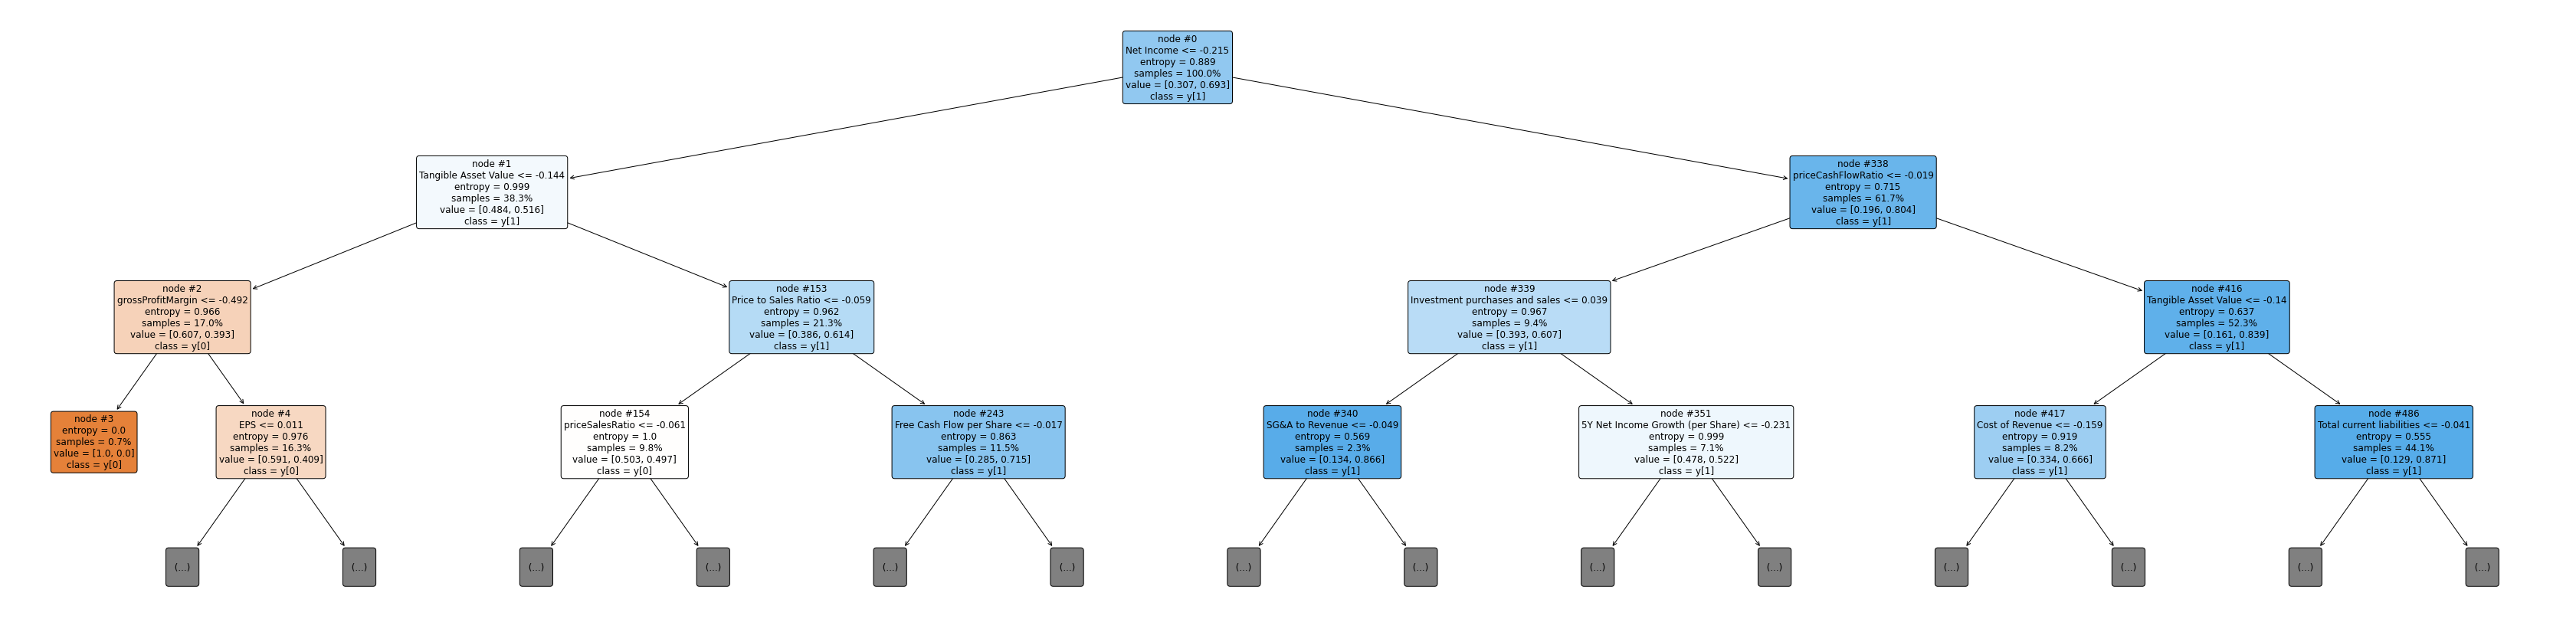

In [83]:
#import tree plot package for visualization
from sklearn import tree

#plot decision tree
fig, ax = plt.subplots(figsize=(60,15))
dt_feature_names = X.columns
tree.plot_tree(decision_tree=dt, feature_names = dt_feature_names, max_depth = 3, fontsize=12, node_ids = True, proportion = True, class_names = True, filled = True, rounded = True);

In [84]:
#Randomforest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_dt = RandomForestClassifier(n_estimators=100,
                               random_state=11)

#Randomforest Accuracy
rf_dt.fit(X_train_dt,y_train_dt)
rf_pred = rf_dt.predict(X_test_dt)
accuracy = float(np.sum(rf_pred==y_test_dt))/y_test_dt.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.729238


In [85]:
fi = dict(zip(df.columns, dt.feature_importances_))

indices = np.argsort(fi)[::-1]

sort_fi = sorted(fi.items(), key=lambda x: x[1], reverse=True)

for i in sort_fi[0:5]:
	print(i[0],':', i[1])

Net Income - Non-Controlling int : 0.0735875669151986
Graham Net-Net : 0.036916972571474804
priceToFreeCashFlowsRatio : 0.02231648100016005
Capital Expenditure : 0.018549048322659824
Total liabilities : 0.017126570455003154


In [86]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE

xg_dt = xgb.XGBClassifier(objective = 'binary:logistic', max_depth=10, n_estimators=20, seed=99)
xg_dt.fit(X_train_dt, y_train_dt)
preds = xg_dt.predict(X_test_dt)
accuracy = float(np.sum(rf_pred==y_test_dt))/y_test_dt.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.729238


In [87]:
data_dmatrix = xgb.DMatrix(data=X,label=y) 
params={"objective":"binary:logistic","max_depth":4}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=4,num_boost_round=10, metrics="error", as_pandas=True) 
print("Accuracy: %f" %((1-cv_results["test-error-mean"]).iloc[-1]))

Accuracy: 0.721767


In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=99)
DecisionTreeRegressor()

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [89]:
RMSE_CV = - cross_val_score(reg, X_train_dt, y_train_dt, scoring='neg_root_mean_squared_error', cv= 10)
reg.fit(X_train_dt, y_train_dt)
y_pred_test = reg.predict(X_test_dt)

In [90]:
#  RMSE for CV
print('CV RMSE: {:.2f}'.format(RMSE_CV.mean()))


# Test RMSE
print('Test RMSE: {:.2f}'.format(MSE(y_test_dt, y_pred_test, squared=False)))

CV RMSE: 0.44
Test RMSE: 0.43


In [91]:
class_dmatrix = xgb.DMatrix(data=X,label=y)
params={"objective":"reg:squarederror","max_depth":4, "alpha":1}
cv_results = xgb.cv(dtrain=class_dmatrix, params=params,nfold=4,num_boost_round=10,metrics="rmse",as_pandas=True,seed=99)
cv_results["test-rmse-mean"].tail(1).values[0]

0.42476925